<a href="https://colab.research.google.com/github/SVS-Final-Year-Project/Xception-Kidney-Cyst-Classification/blob/main/XceptionCTScan(ADAM)_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# necessary libraries
import os
import pandas as pd

# visualizations libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
%matplotlib inline

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# model evaluation libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
path = '/gdrive/My Drive/FinalYearProject/Dataset'
os.listdir(path)

['Cyst', 'Normal']

In [ ]:
cyst_data= r"/gdrive/My Drive/FinalYearProject/Dataset/Cyst"
print("Cyst images :\n" ,os.listdir(cyst_data)[:5])

normal_data= r"/gdrive/My Drive/FinalYearProject/Dataset/Normal"
print("\nnormal images :\n" ,os.listdir(normal_data)[:5])

Cyst images :
 ['Cyst- (3368).jpg', 'Cyst- (3351).jpg', 'Cyst- (3355).jpg', 'Cyst- (3350).jpg', 'Cyst- (3377).jpg']

normal images :
 ['Normal- (4095).jpg', 'Normal- (4093).jpg', 'Normal- (4092).jpg', 'Normal- (4081).jpg', 'Normal- (4075).jpg']


In [ ]:
print("no. of cyst images :" ,len(os.listdir(cyst_data)))
print("\nno. of normal images :" ,len(os.listdir(normal_data)))

no. of cyst images : 3500

no. of normal images : 3500


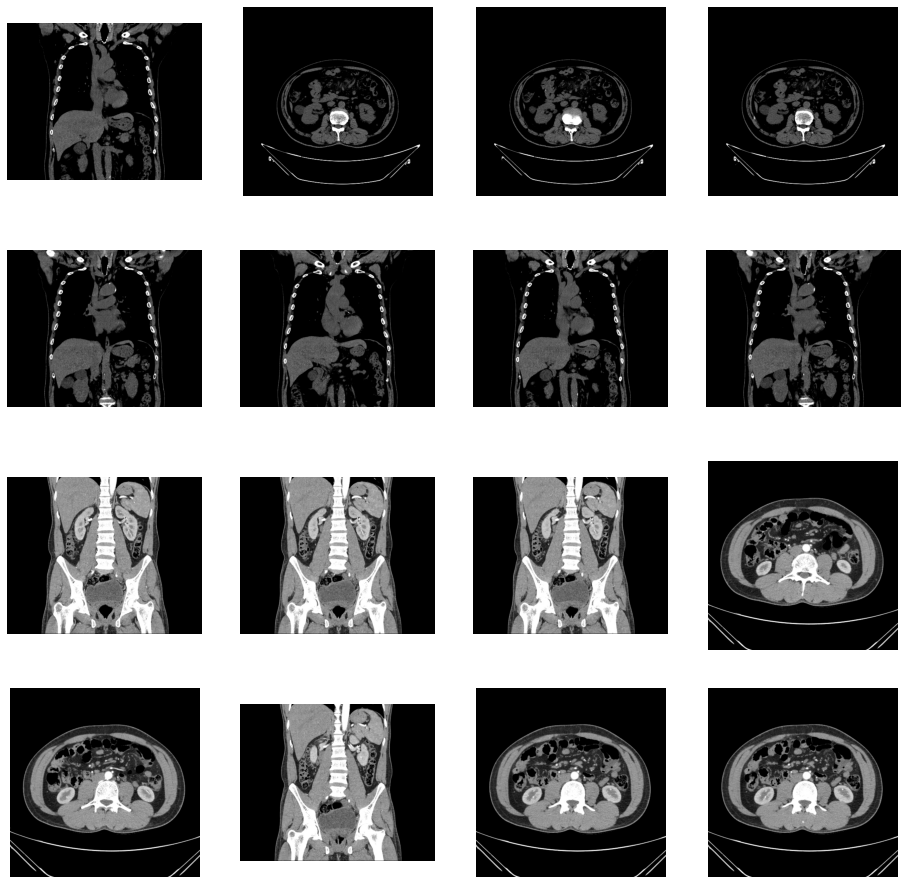

In [ ]:
nrows= 4
ncols= 4
pic_index= 0

fig= plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8

cyst_img = [os.path.join(cyst_data, image) for image in os.listdir(cyst_data)[pic_index-8:pic_index]]
normal_img = [os.path.join(normal_data, image) for image in os.listdir(normal_data)[pic_index-8:pic_index]]

for i, image_path in enumerate(cyst_img+normal_img):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 

    img = mpimg.imread(image_path)
    plt.imshow(img)

plt.show()

In [ ]:
# generating training data
print("Training data :")
train_datagen= ImageDataGenerator(rescale=1/255, zoom_range=0.3, rotation_range=50, width_shift_range= 0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest', validation_split = 0.2)

train_data = train_datagen.flow_from_directory(path, 
                                              target_size= (200, 200),
                                              class_mode= "binary",
                                              batch_size=20,
                                              subset= "training"
                                              )

# genarating validation data
print("\nValidation data :")
val_datagen= ImageDataGenerator(rescale= 1/255, validation_split= 0.2)

val_data= train_datagen.flow_from_directory(path, 
                                              target_size= (200, 200),
                                              class_mode= "binary",
                                              batch_size=20,
                                              shuffle= False,
                                              subset= "validation"
                                              )

Training data :
Found 5600 images belonging to 2 classes.

Validation data :
Found 1400 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'Cyst': 0, 'Normal': 1}

In [ ]:
from keras.applications import xception

base_model = xception.Xception(weights='imagenet',include_top=False,input_shape=(200,200, 3),pooling='avg')

83697664/83683744 [==============================] - 0s 0us/step


In [ ]:
top_model = Sequential()

top_model.add(Dense(256, activation='relu', input_shape=base_model.output_shape[1:]))
top_model.add(Dropout(0.5))

top_model.add(Dense(128, activation='relu'))
top_model.add(Dropout(0.5))

top_model.add(Dense(1, activation='sigmoid'))
model = Model(inputs=base_model.input, outputs=top_model(base_model.output))

model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history= model.fit(train_data,
                   steps_per_epoch= train_data.samples//train_data.batch_size,
                   validation_data= val_data,
                   validation_steps= val_data.samples//val_data.batch_size,
                   epochs= 10,
                   verbose=1 
                  )

Epoch 1/10
280/280 [==============================] - 1179s 4s/step - loss: 0.1227 - accuracy: 0.9598 - val_loss: 1.6724 - val_accuracy: 0.9121
Epoch 2/10
280/280 [==============================] - 140s 499ms/step - loss: 0.0517 - accuracy: 0.9855 - val_loss: 0.5975 - val_accuracy: 0.8807
Epoch 3/10
280/280 [==============================] - 140s 500ms/step - loss: 0.0298 - accuracy: 0.9925 - val_loss: 0.3625 - val_accuracy: 0.9607
Epoch 4/10
280/280 [==============================] - 140s 500ms/step - loss: 0.0242 - accuracy: 0.9941 - val_loss: 0.2353 - val_accuracy: 0.9229
Epoch 5/10
280/280 [==============================] - 141s 501ms/step - loss: 0.0186 - accuracy: 0.9954 - val_loss: 2.2374 - val_accuracy: 0.8743
Epoch 6/10
280/280 [==============================] - 142s 506ms/step - loss: 0.0131 - accuracy: 0.9957 - val_loss: 1.9820 - val_accuracy: 0.8921
Epoch 7/10
280/280 [==============================] - 140s 501ms/step - loss: 0.0156 - accuracy: 0.9959 - val_loss: 0.3781 - v

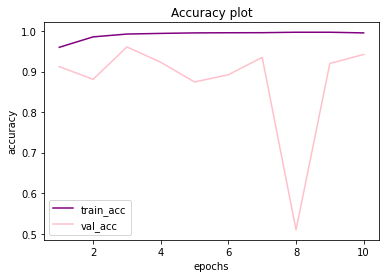

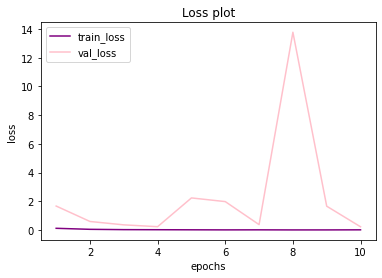

In [ ]:
epochs= range(1, len(history.history["accuracy"])+1)

plt.plot(epochs, history.history["accuracy"], color="purple")
plt.plot(epochs, history.history["val_accuracy"], color="pink")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc", "val_acc"])
plt.show()

plt.plot(epochs, history.history["loss"], color="purple")
plt.plot(epochs, history.history["val_loss"], color="pink")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss", "val_loss"])
plt.show()

In [ ]:
import numpy as np
prediction= model.predict(val_data, steps=np.ceil(val_data.samples/val_data.batch_size), verbose=2)
prediction= (prediction > 0.5)
prediction

70/70 - 27s - 27s/epoch - 384ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
val_labels=val_data.classes
val_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

0.9385714285714286
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       700
           1       0.92      0.96      0.94       700

    accuracy                           0.94      1400
   macro avg       0.94      0.94      0.94      1400
weighted avg       0.94      0.94      0.94      1400



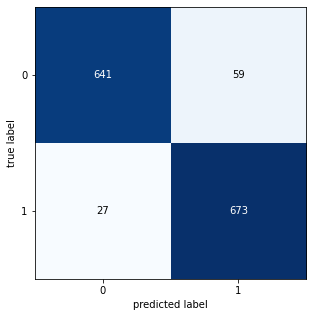

In [ ]:
cm= confusion_matrix(val_data.classes, prediction)
plot_confusion_matrix(cm, figsize=(5,5))

print(accuracy_score(val_data.classes, prediction))
print(classification_report(val_data.classes, prediction))